### 3rd_Cupoy ML 100 marathon Final exam

In [10]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras import backend

### Data Preprocessing

In [2]:
path = "C:/Users/infiark/Desktop/ml100-03-final/image_data/train"
flower = os.listdir(path)
flower

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [3]:
def make_train_data(train, labels, img_size, flower_type, Dir):
    for data_name in os.listdir(Dir):
        img_path = os.path.join(Dir, data_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, img_size)
        
        train.append(np.array(img))
        labels.append(flower_type)

train = []
flower_label = []
img_size = (224,224)

for i in flower:
    print(i)
    data_path = os.path.join(path,i)
    make_train_data(train, flower_label, img_size, i, data_path)

daisy
dandelion
rose
sunflower
tulip


In [4]:
print(len(train))
print(len(flower_label))

2823
2823


### Label Encoding

In [5]:
num_classes = 5

train = np.array(train) / 255.

le = LabelEncoder()
labels = le.fit_transform(flower_label)
labels = to_categorical(labels, num_classes)

### Split train and validation set

In [6]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25, random_state=42)

### Data Visualization

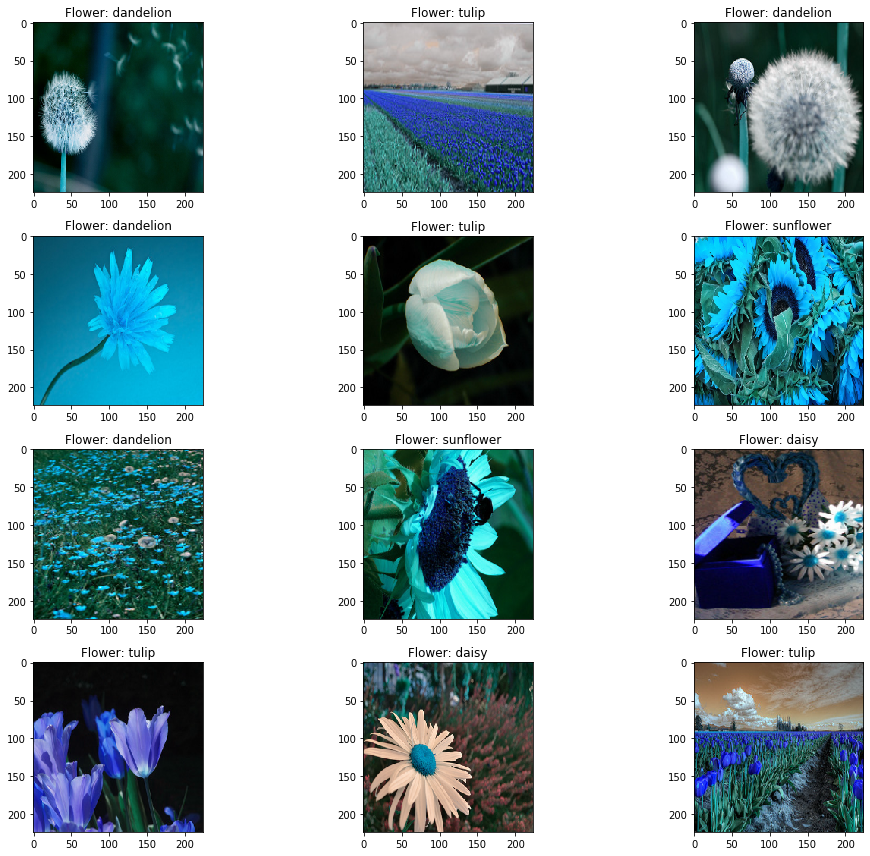

In [7]:
fig,ax = plt.subplots(4,3)
fig.set_size_inches(15,12)
for i in range(4):
    for j in range (3):
        l = random.randint(0, len(train))
        ax[i,j].imshow(train[l])
        ax[i,j].set_title('Flower: '+flower_label[l])
        
plt.tight_layout()

### Model Training

#### Build Model

In [11]:
# dimensions of our images.
img_width, img_height = 224, 224

nb_train_samples = len(x_train)
nb_validation_samples = len(x_test)
epochs = 50
batch_size = 16

if backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Dropout, Flatten
from keras.optimizers import RMSprop


# VGG in Sequential Model
model = Sequential()
model.add(VGG16(include_top=False, weights='imagenet', input_shape=input_shape))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()


58892288/58889256 [==============================] - 45s 1us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 21,138,757
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#### Data Augmentation

In [14]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

In [15]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs, validation_data = (x_test, y_test),
                              verbose = 1, steps_per_epoch = x_train.shape[0] // batch_size)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/50
132/132 [==============================] - 786s 6s/step - loss: 1.6704 - accuracy: 0.2604 - val_loss: 1.5547 - val_accuracy: 0.2535
Epoch 2/50
132/132 [==============================] - 794s 6s/step - loss: 1.5990 - accuracy: 0.2694 - val_loss: 1.6055 - val_accuracy: 0.2110
Epoch 3/50
132/132 [==============================] - 802s 6s/step - loss: 1.5915 - accuracy: 0.2675 - val_loss: 1.5170 - val_accuracy: 0.2932
Epoch 4/50
132/132 [==============================] - 798s 6s/step - loss: 1.5180 - accuracy: 0.3398 - val_loss: 1.1465 - val_accuracy: 0.5864
Epoch 5/50
132/132 [==============================] - 822s 6s/step - loss: 1.4093 - accuracy: 0.4284 - val_loss: 1.6005 - val_accuracy: 0.2450
Epoch 6/50
132/132 [==============================] - 837s 6s/step - loss: 1.5986 - accuracy: 0.2475 - val_loss: 1.6069 - val_accuracy: 0.2110
Epoch 7/50
132/132 [==============================] - 842s 6s/step - loss: 1.5904 - accuracy: 0.2413 - val_loss: 1.5622 - val_accuracy: 0.297

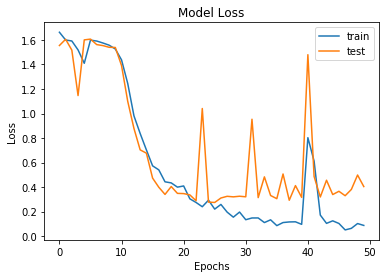

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

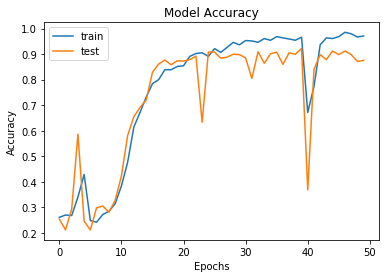

In [18]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [19]:
# save model 
model.save_weights('first_try.h5')

In [33]:
def make_test_data(test, img_size, Dir):
    for data_name in os.listdir(Dir):
        img_path = os.path.join(Dir, data_name)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, img_size)
        
        test.append(np.array(img))
        
test = []
img_size = (224, 224)
test_path = "C:/Users/infiark/Desktop/ml100-03-final/image_data/test"
make_test_data(test, img_size, test_path)

In [34]:
test = np.array(test) / 255.
pred = model.predict(test)

pred_digits = np.argmax(pred, axis=1)
print(pred_digits)

[2 4 4 ... 0 3 2]


In [35]:
import pandas as pd

filename = [f for f in os.listdir(test_path) if os.path.isfile(os.path.join(test_path, f))]

df = pd.DataFrame(list(zip(filename, pred_digits)), columns =['id', 'flower_class'])
df['id'] = df['id'].str.replace('.jpg', '')
df.to_csv('result.csv', index=False, header=True)